Seaborn - Intro

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Install and Import Seaborn Libraries

In [2]:
# pip install seaborn in terminal
import seaborn as sns

In [3]:
# Only get data analyst jobs in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode(column='job_skills')

In [5]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).copy()

In [6]:
# Top 10 Highest Median Salary by Skills
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10).copy()
df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [7]:
# Top 10 Highest Median Salary by Most Skills

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).copy()
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


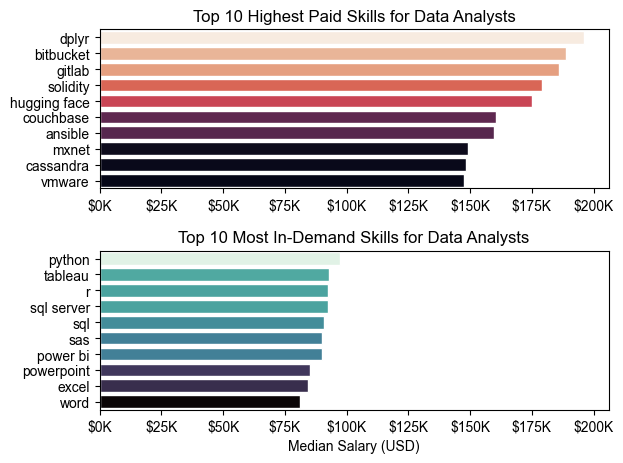

In [8]:
# Ploting using seaborn
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='whitegrid')

sns.barplot(
    data=df_DA_US_top_pay, 
    x='median', 
    y=df_DA_US_top_pay.index, 
    ax=ax[0],
    hue='median', 
    palette='rocket', 
    legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

sns.barplot(
    data=df_DA_skills, 
    x='median', 
    y=df_DA_skills.index, 
    ax=ax[1],
    hue='median', 
    palette='mako', 
    legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.tight_layout()
plt.show()

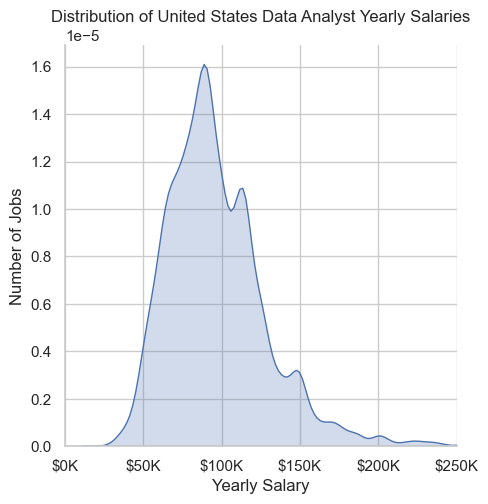

In [9]:
# Plot Histogram using seaborn
sns.displot(data=df_DA_US['salary_year_avg'], kind='kde', fill=True)

plt.xlim(0, 250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.show()

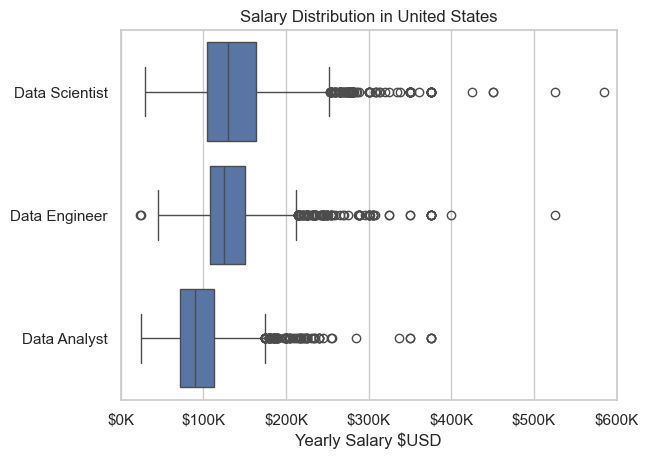

In [10]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the data to appropriate job_titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# Plot Boxplot using seaborn
sns.boxplot(
    data=df_US, 
    x='salary_year_avg', 
    y='job_title_short',
    order=job_titles[::-1])

plt.title('Salary Distribution in United States')
plt.xlabel('Yearly Salary $USD')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0, 600000)
plt.show()